### ML Models

In [330]:
import pandas as pd
#Libraries used
import pandas as pd
import numpy as np
import geopandas as gpd # for mapping
import matplotlib.pyplot as plt

import descartes # for mapping
from shapely.geometry import Point, Polygon #for mapping
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap

#for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn.metrics import classification_report

#fig, ax = plt.subplots(figsize=(15,15))
plt.style.use('seaborn')

%matplotlib inline

In [331]:
#df_main = pd.read_csv('acs_city.csv', index_col = 0)

In [490]:
df = pd.read_csv('acs_city_final.csv', index_col = 0).reset_index(drop = True)

In [491]:
df.columns

Index(['parcel_number_assess', 'depth_assess', 'year_built_assess',
       'zip_code_assess', 'lat_assess', 'lng_assess', 'geometry_assess',
       'vacant_assess', 'market_value_2015_assess', 'market_value_2016_assess',
       'market_value_2017_assess', 'market_value_2018_assess',
       'market_value_2019_assess', 'market_value_2020_assess',
       'market_value_2021_assess', 'num_years_owed_tax',
       'building_category_tax', 'is_actionable_tax', 'bankruptcy_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'principal_due_tax', 'total_due_tax',
       'total_assessment_tax', 'casenumber_diff_vio',
       'casecreateddate_year_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio', 'geometry', 'buffer_50m', 'crime_count_50m_6m',
       'crime_count_50m_3y6m', 'crime_count_50m_all', 'call_count_50m_3y6m',
       'call_count_50m_all', 'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs',
       'Shape__Are_acs', 'Shape__Len_acs'

In [492]:
df.head()

,parcel_number_assess,depth_assess,year_built_assess,zip_code_assess,lat_assess,lng_assess,geometry_assess,vacant_assess,market_value_2015_assess,market_value_2016_assess,...,Shape__Len_acs,other_vacant_acs,total_housing_acs,occupied_acs,vacant_acs,perc_vacant_acs,perc_other_vacant_acs,total_pop_acs,area_m_acs,pop_density_km_acs
0,451106305,256.00,0.0,19134.0,-75.092534,39.991459,POINT (-75.09253430091161 39.99145897715201),1,0.0,0.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
1,882021470,64.00,1929.0,19137.0,-75.087807,39.991424,POINT (-75.08780743936106 39.99142427758184),0,346400.0,346400.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
2,882059200,200.75,1980,19137.0,-75.093599,39.994604,POINT (-75.09359890860864 39.9946039149071),0,1326900.0,1326900.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
3,882076300,279.81,2008,19134.0,-75.095261,39.993647,POINT (-75.0952607737023 39.99364667194213),0,1735600.0,1735600.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
4,453297000,248.00,1920,19137.0,-75.084600,39.992123,POINT (-75.08459994726104 39.99212306645117),0,172100.0,172100.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173


In [493]:
df.head().T

,0,1,2,3,4
parcel_number_assess,451106305,882021470,882059200,882076300,453297000
depth_assess,256.0,64.0,200.75,279.81,248.0
year_built_assess,0.0,1929.0,1980,2008,1920
zip_code_assess,19134.0,19137.0,19137.0,19134.0,19137.0
lat_assess,-75.092534,-75.087807,-75.093599,-75.095261,-75.0846
lng_assess,39.991459,39.991424,39.994604,39.993647,39.992123
geometry_assess,POINT (-75.09253430091161 39.99145897715201),POINT (-75.08780743936106 39.99142427758184),POINT (-75.09359890860864 39.9946039149071),POINT (-75.0952607737023 39.99364667194213),POINT (-75.08459994726104 39.99212306645117)
vacant_assess,1,0,0,0,0
market_value_2015_assess,0.0,346400.0,1326900.0,1735600.0,172100.0
market_value_2016_assess,0.0,346400.0,1326900.0,1735600.0,172100.0


In [494]:
df.shape

(460901, 50)

In [495]:
df.dtypes

parcel_number_assess               int64
depth_assess                     float64
year_built_assess                 object
zip_code_assess                  float64
lat_assess                       float64
lng_assess                       float64
geometry_assess                   object
vacant_assess                      int64
market_value_2015_assess         float64
market_value_2016_assess         float64
market_value_2017_assess         float64
market_value_2018_assess         float64
market_value_2019_assess         float64
market_value_2020_assess         float64
market_value_2021_assess         float64
num_years_owed_tax               float64
building_category_tax             object
is_actionable_tax                 object
bankruptcy_tax                    object
sheriff_sale_tax                  object
sequestration_enforcement_tax     object
payment_agreement_tax             object
principal_due_tax                float64
total_due_tax                    float64
total_assessment

In [496]:
df.isna().sum()

parcel_number_assess                  0
depth_assess                        507
year_built_assess                  2146
zip_code_assess                       0
lat_assess                            0
lng_assess                            0
geometry_assess                       0
vacant_assess                         0
market_value_2015_assess           2956
market_value_2016_assess           2955
market_value_2017_assess           2955
market_value_2018_assess           2950
market_value_2019_assess           1951
market_value_2020_assess            719
market_value_2021_assess            321
num_years_owed_tax               399186
building_category_tax            399261
is_actionable_tax                399186
bankruptcy_tax                   399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
principal_due_tax                399186
total_due_tax                    399186
total_assessment_tax             399260


In [497]:
(df.isna().sum()/df.shape[0])*100# percentage of null values

parcel_number_assess              0.000000
depth_assess                      0.110002
year_built_assess                 0.465610
zip_code_assess                   0.000000
lat_assess                        0.000000
lng_assess                        0.000000
geometry_assess                   0.000000
vacant_assess                     0.000000
market_value_2015_assess          0.641352
market_value_2016_assess          0.641136
market_value_2017_assess          0.641136
market_value_2018_assess          0.640051
market_value_2019_assess          0.423301
market_value_2020_assess          0.155999
market_value_2021_assess          0.069646
num_years_owed_tax               86.609923
building_category_tax            86.626195
is_actionable_tax                86.609923
bankruptcy_tax                   86.609923
sheriff_sale_tax                 86.609923
sequestration_enforcement_tax    86.609923
payment_agreement_tax            86.609923
principal_due_tax                86.609923
total_due_t

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460901 entries, 0 to 460900
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   parcel_number_assess           460901 non-null  int64  
 1   depth_assess                   460394 non-null  float64
 2   year_built_assess              458755 non-null  object 
 3   zip_code_assess                460901 non-null  float64
 4   lat_assess                     460901 non-null  float64
 5   lng_assess                     460901 non-null  float64
 6   geometry_assess                460901 non-null  object 
 7   vacant_assess                  460901 non-null  int64  
 8   market_value_2015_assess       457945 non-null  float64
 9   market_value_2016_assess       457946 non-null  float64
 10  market_value_2017_assess       457946 non-null  float64
 11  market_value_2018_assess       457951 non-null  float64
 12  market_value_2019_assess      

In [499]:
df['vacant_assess'].value_counts()

0    424202
1     36699
Name: vacant_assess, dtype: int64

In [500]:
#converting values to  objects
df['parcel_number_assess'] = df['parcel_number_assess'].astype('category')
df['zip_code_assess'] = df['zip_code_assess'].astype('category')
df['TRACTCE10_acs'] = df['TRACTCE10_acs'].astype('category')
df['BLKGRPCE10_acs'] = df['BLKGRPCE10_acs'].astype('category')
df['GEOID10_acs'] = df['GEOID10_acs'].astype('category')

In [ ]:
df['year_built_assess'] = df['year_built_assess'].replace(['196Y'], '1960')

In [ ]:
df.loc[df['year_built_assess'] == 0].shape# big percentage of year built column is 0 so it is best of remove the column

(34580, 34)

In [ ]:
DataFrame(df.year_built_assess.value_counts().sort_values(ascending = False)/df.shape[0])
#most of the are built in 1925 and 1920

,year_built_assess
1925.0,0.215387
1920.0,0.156031
0.0,0.075027
1950.0,0.074487
1915.0,0.067570
...,...
1943,0.000002
1904.0,0.000002
1869,0.000002
1885,0.000002


In [ ]:
df['year_built_assess'].isna().sum()#there are also 2146 that are null values

2146

In [ ]:
df['year_built_assess_diff'].median()

96.0

In [501]:
#manipulating yearbuilt
df['year_built_assess'] = df['year_built_assess'].replace(['196Y'], '1960')
df['year_built_assess'] = df['year_built_assess'].astype('float')
df['year_built_assess_diff'] = 2021 - df['year_built_assess']

#96 is the median, so replacing all irregular values with 96
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(2021, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(-7129.0, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace([-1, -2], 0) # replacing with 0 as the year is more than 2021 here

df['year_built_assess_diff'] = df['year_built_assess_diff'].fillna(96)#replacing all null values with 96

In [502]:
df = df.drop(['year_built_assess'], axis = 1)

In [503]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
geometry_assess                    object
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2016_assess          float64
market_value_2017_assess          float64
market_value_2018_assess          float64
market_value_2019_assess          float64
market_value_2020_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
bankruptcy_tax                     object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
principal_due_tax                 float64
total_due_tax                     float64
total_assessment_tax              

In [504]:
df['building_category_tax'].unique()# column has null values

array([nan, 'residential', 'commercial'], dtype=object)

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3260832947.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'depth_assess'}>,
        <AxesSubplot:title={'center':'lat_assess'}>,
        <AxesSubplot:title={'center':'lng_assess'}>,
        <AxesSubplot:title={'center':'vacant_assess'}>,
        <AxesSubplot:title={'center':'market_value_2015_assess'}>,
        <AxesSubplot:title={'center':'market_value_2016_assess'}>],
       [<AxesSubplot:title={'center':'market_value_2017_assess'}>,
        <AxesSubplot:title={'center':'market_value_2018_assess'}>,
        <AxesSubplot:title={'center':'market_value_2019_assess'}>,
        <AxesSubplot:title={'center':'market_value_2020_assess'}>,
        <AxesSubplot:title={'center':'market_value_2021_assess'}>,
        <AxesSubplot:title={'center':'num_years_owed_tax'}>],
       [<AxesSubplot:title={'center':'principal_due_tax'}>,
        <AxesSubplot:title={'center':'total_due_tax'}>,
        <AxesSubplot:title={'center':'total_assessment_tax'}>,
        <AxesSubplot:title={'center':'casenumber_diff_vio'}>,
        <A

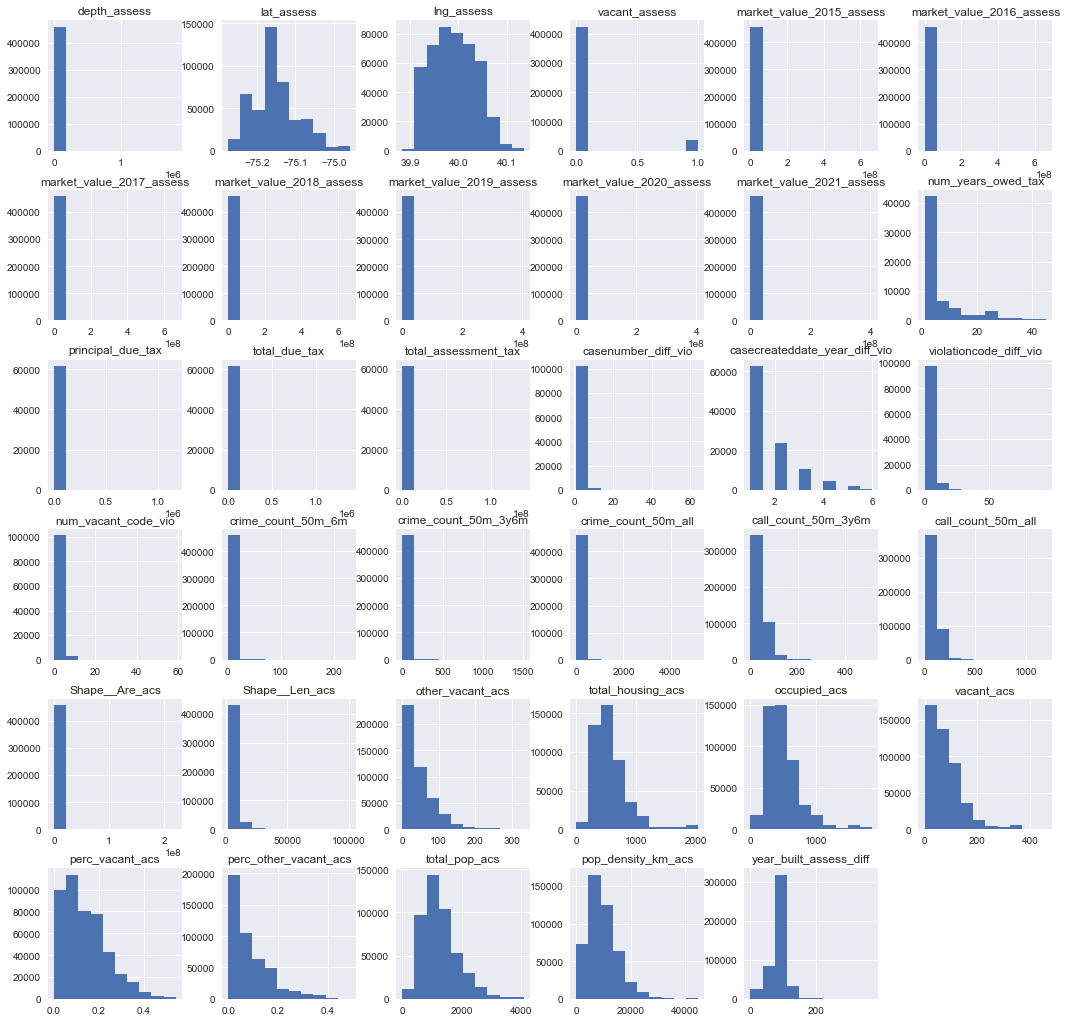

In [505]:
fig,ax = plt.subplots(figsize = (18,18))# checking histogram to see distribution
df.hist(ax = ax)

In [506]:
df[['building_category_tax', 'is_actionable_tax', 'bankruptcy_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'principal_due_tax', 'total_due_tax',
       'total_assessment_tax', 'casenumber_diff_vio',
       'casecreateddate_year_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio']].dtypes # columns with high percentage of null values

building_category_tax             object
is_actionable_tax                 object
bankruptcy_tax                    object
sheriff_sale_tax                  object
sequestration_enforcement_tax     object
payment_agreement_tax             object
principal_due_tax                float64
total_due_tax                    float64
total_assessment_tax             float64
casenumber_diff_vio              float64
casecreateddate_year_diff_vio    float64
violationcode_diff_vio           float64
num_vacant_code_vio              float64
dtype: object

In [507]:
#replacing null values with 0 for all integer columns
df['num_years_owed_tax'] = df['num_years_owed_tax'].fillna(0)
df['principal_due_tax'] = df['principal_due_tax'].fillna(0)
df['total_due_tax'] = df['total_due_tax'].fillna(0)
df['casenumber_diff_vio'] = df['casenumber_diff_vio'].fillna(0)
df['casecreateddate_year_diff_vio'] = df['casecreateddate_year_diff_vio'].fillna(0)
df['violationcode_diff_vio'] = df['violationcode_diff_vio'].fillna(0)
df['num_vacant_code_vio'] = df['num_vacant_code_vio'].fillna(0)

In [508]:
df[['building_category_tax', 'is_actionable_tax', 'bankruptcy_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'principal_due_tax', 'total_due_tax',
       'total_assessment_tax', 'casenumber_diff_vio',
       'casecreateddate_year_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio']].isna().sum()
# we wil remove the total_asssessment_tax as the amount is based off the value of the property. There are other columns that has property values

building_category_tax            399261
is_actionable_tax                399186
bankruptcy_tax                   399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
principal_due_tax                     0
total_due_tax                         0
total_assessment_tax             399260
casenumber_diff_vio                   0
casecreateddate_year_diff_vio         0
violationcode_diff_vio                0
num_vacant_code_vio                   0
dtype: int64

In [509]:
df['building_category_tax'].fillna("no-tax", inplace = True) #residential or commercial
df['is_actionable_tax'].fillna("no-tax", inplace = True)
df['sheriff_sale_tax'].fillna("N", inplace = True) #N means not in shriff sale process
df['sequestration_enforcement_tax'].fillna("False", inplace = True) #False means not in sequestration_enforcement
df['payment_agreement_tax'].fillna("False", inplace = True)#False means not in payment agreement

In [510]:
df = df.drop(['bankruptcy_tax','total_assessment_tax'], axis = 1) #dropping bankrupcy_tax as all values are False, 
#removing total_assessment_tax as as this value is based off the property assessment which we have already

In [511]:
(df.isna().sum()/df.shape[0])*100 # there are still some null values left. We will work with them later if we end up using them in the final model

parcel_number_assess             0.000000
depth_assess                     0.110002
zip_code_assess                  0.000000
lat_assess                       0.000000
lng_assess                       0.000000
geometry_assess                  0.000000
vacant_assess                    0.000000
market_value_2015_assess         0.641352
market_value_2016_assess         0.641136
market_value_2017_assess         0.641136
market_value_2018_assess         0.640051
market_value_2019_assess         0.423301
market_value_2020_assess         0.155999
market_value_2021_assess         0.069646
num_years_owed_tax               0.000000
building_category_tax            0.000000
is_actionable_tax                0.000000
sheriff_sale_tax                 0.000000
sequestration_enforcement_tax    0.000000
payment_agreement_tax            0.000000
principal_due_tax                0.000000
total_due_tax                    0.000000
casenumber_diff_vio              0.000000
casecreateddate_year_diff_vio    0

In [512]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
geometry_assess                    object
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2016_assess          float64
market_value_2017_assess          float64
market_value_2018_assess          float64
market_value_2019_assess          float64
market_value_2020_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
principal_due_tax                 float64
total_due_tax                     float64
casenumber_diff_vio               float64
casecreateddate_year_diff_vio     

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3199843707.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'depth_assess'}>,
        <AxesSubplot:title={'center':'lat_assess'}>,
        <AxesSubplot:title={'center':'lng_assess'}>,
        <AxesSubplot:title={'center':'vacant_assess'}>,
        <AxesSubplot:title={'center':'market_value_2015_assess'}>,
        <AxesSubplot:title={'center':'market_value_2016_assess'}>],
       [<AxesSubplot:title={'center':'market_value_2017_assess'}>,
        <AxesSubplot:title={'center':'market_value_2018_assess'}>,
        <AxesSubplot:title={'center':'market_value_2019_assess'}>,
        <AxesSubplot:title={'center':'market_value_2020_assess'}>,
        <AxesSubplot:title={'center':'market_value_2021_assess'}>,
        <AxesSubplot:title={'center':'num_years_owed_tax'}>],
       [<AxesSubplot:title={'center':'principal_due_tax'}>,
        <AxesSubplot:title={'center':'total_due_tax'}>,
        <AxesSubplot:title={'center':'casenumber_diff_vio'}>,
        <AxesSubplot:title={'center':'casecreateddate_year_diff_vio'}>,
 

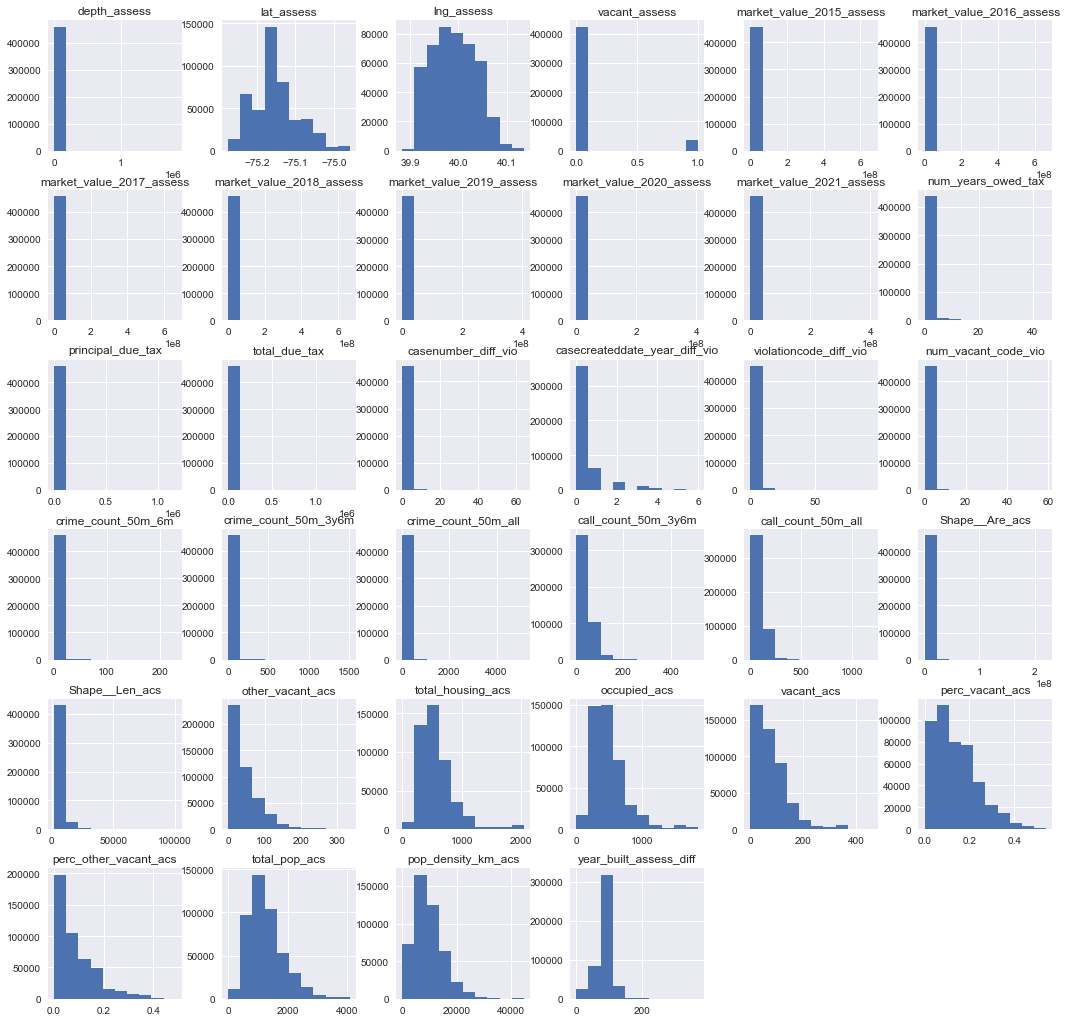

In [513]:
#histogram after replacing columns with high null values. Most columns are still heavily skewed
fig,ax = plt.subplots(figsize = (18,18))
df.hist(ax = ax)

<AxesSubplot:>

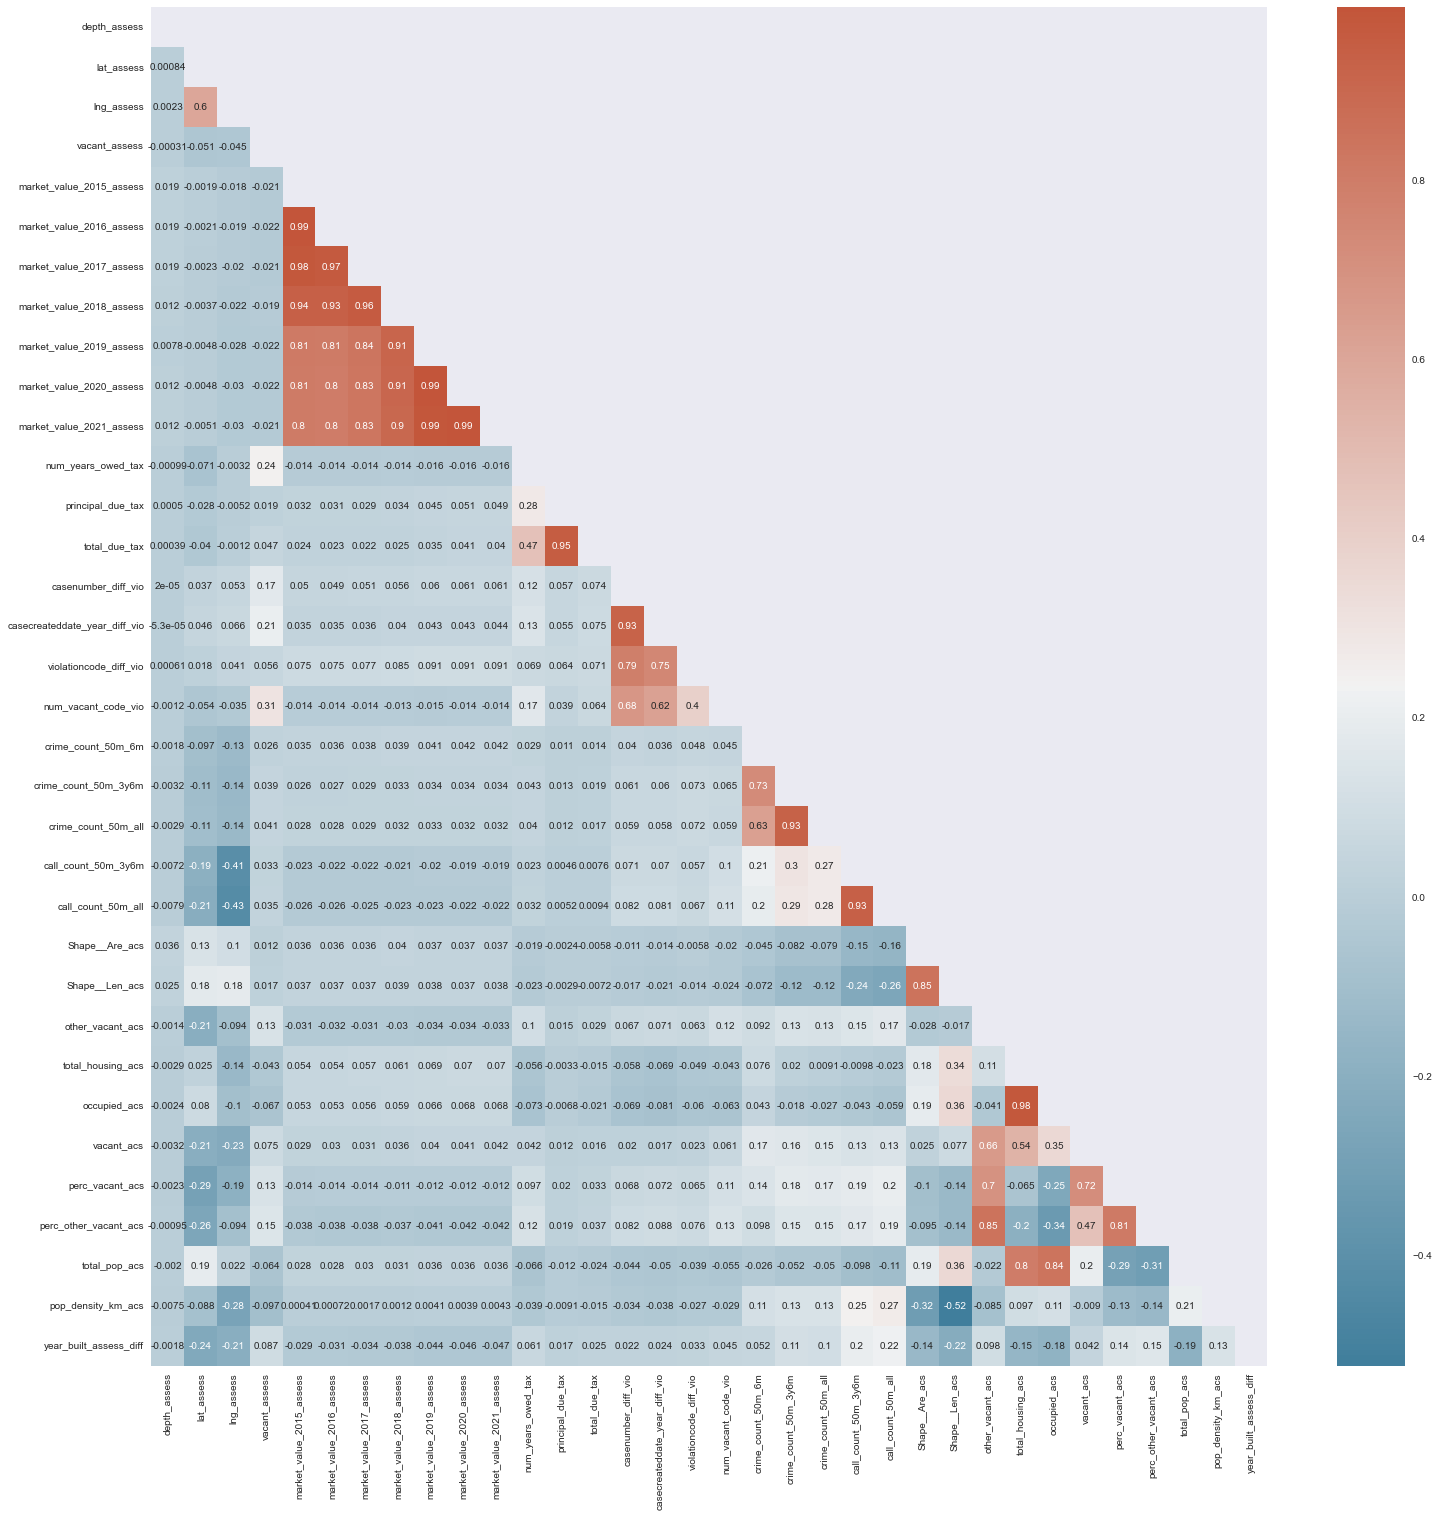

In [514]:
#correlation matrix
corr = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [515]:
#removing columns that has more than 0.9 in correlation
df = df.drop(['principal_due_tax', 'casecreateddate_year_diff_vio', 'crime_count_50m_3y6m',
        'call_count_50m_3y6m', 'occupied_acs', 'market_value_2016_assess', 'market_value_2017_assess', 'market_value_2018_assess', 'market_value_2019_assess', 'market_value_2020_assess'], axis = 1)


In [516]:
df.columns

Index(['parcel_number_assess', 'depth_assess', 'zip_code_assess', 'lat_assess',
       'lng_assess', 'geometry_assess', 'vacant_assess',
       'market_value_2015_assess', 'market_value_2021_assess',
       'num_years_owed_tax', 'building_category_tax', 'is_actionable_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'total_due_tax', 'casenumber_diff_vio',
       'violationcode_diff_vio', 'num_vacant_code_vio', 'geometry',
       'buffer_50m', 'crime_count_50m_6m', 'crime_count_50m_all',
       'call_count_50m_all', 'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs',
       'Shape__Are_acs', 'Shape__Len_acs', 'other_vacant_acs',
       'total_housing_acs', 'vacant_acs', 'perc_vacant_acs',
       'perc_other_vacant_acs', 'total_pop_acs', 'area_m_acs',
       'pop_density_km_acs', 'year_built_assess_diff'],
      dtype='object')

<AxesSubplot:>

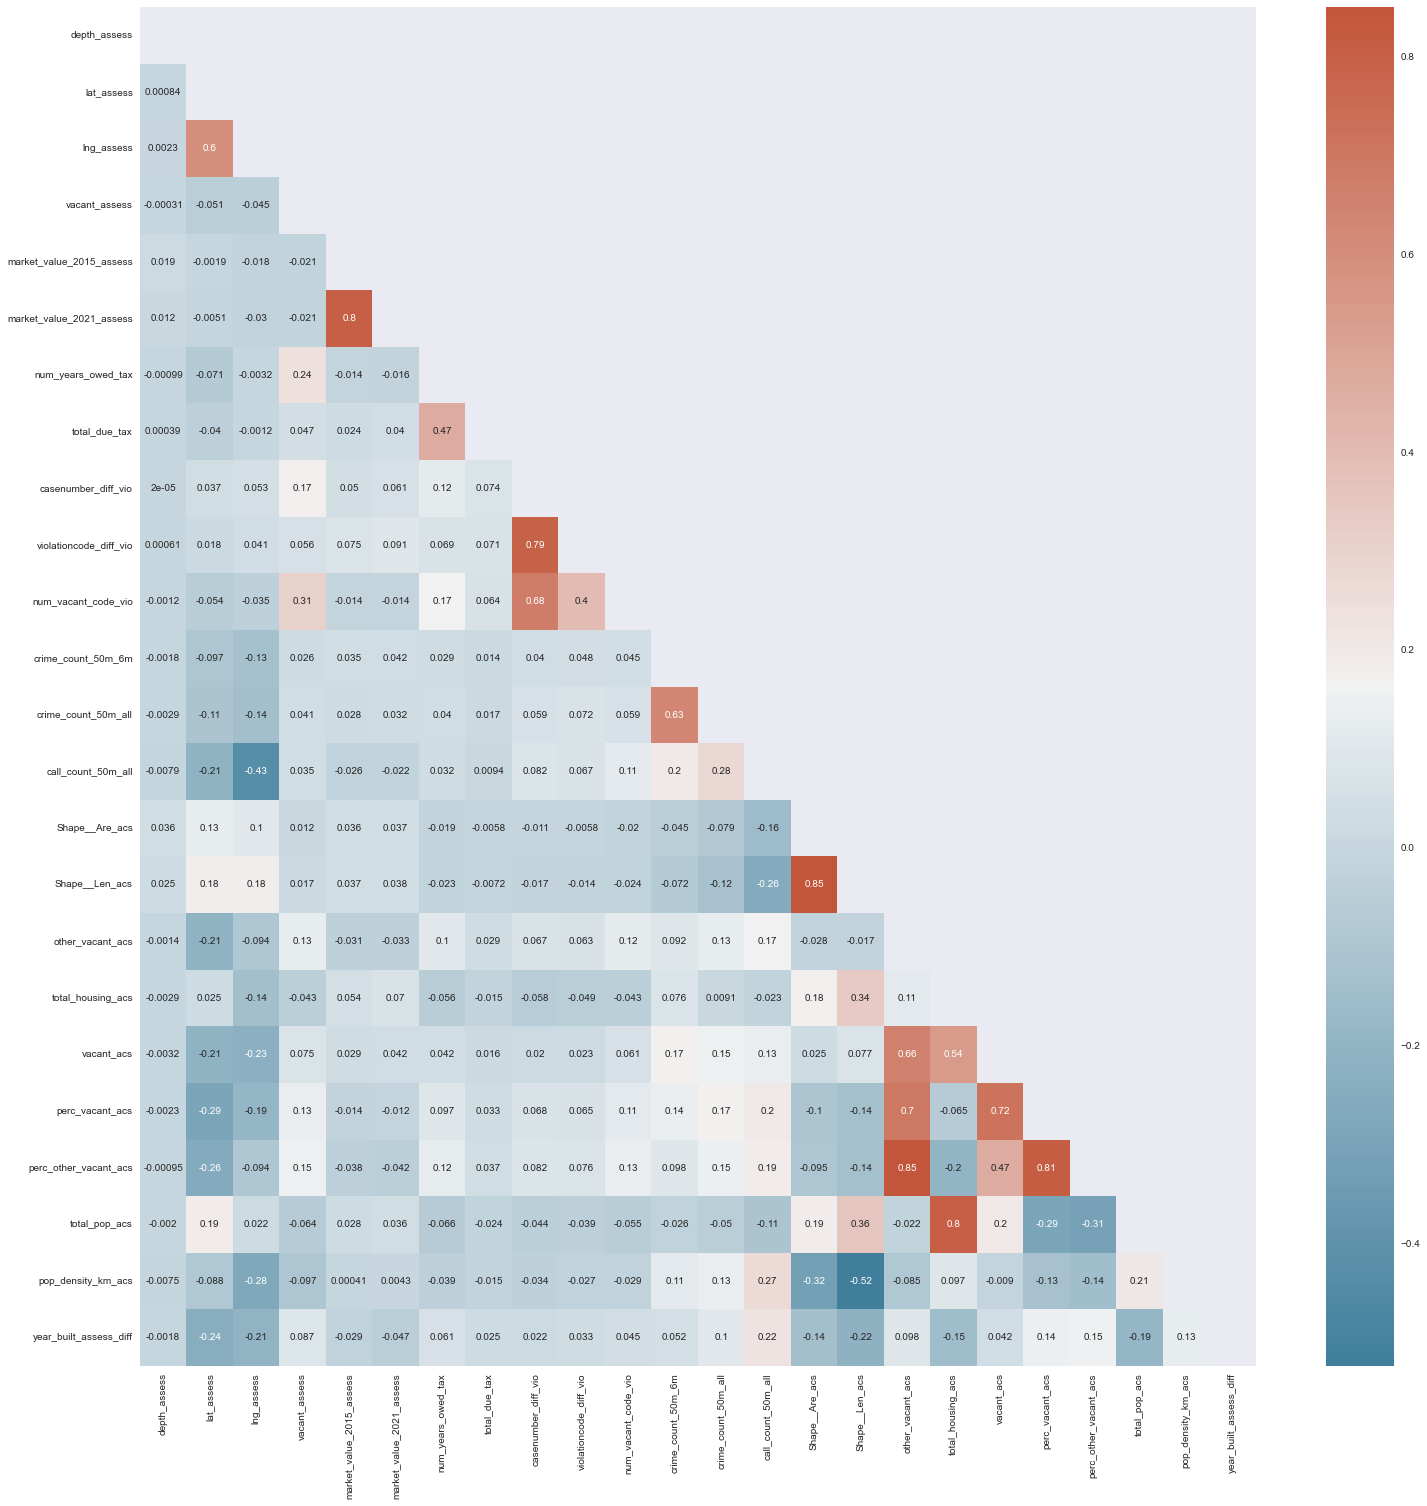

In [517]:
#checking correlation after removing columns with high correlation
corr = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [518]:
df.shape

(460901, 38)

In [519]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
geometry_assess                    object
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
geometry                           object
buffer_50m                         object
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                

In [520]:
df = df.drop(['geometry_assess', 'geometry', 'buffer_50m','area_m_acs'], axis = 1) #dropping these as they seem irrelevant to the ML model

In [521]:
df.shape

(460901, 34)

In [522]:
df.isna().sum()

parcel_number_assess                0
depth_assess                      507
zip_code_assess                     0
lat_assess                          0
lng_assess                          0
vacant_assess                       0
market_value_2015_assess         2956
market_value_2021_assess          321
num_years_owed_tax                  0
building_category_tax               0
is_actionable_tax                   0
sheriff_sale_tax                    0
sequestration_enforcement_tax       0
payment_agreement_tax               0
total_due_tax                       0
casenumber_diff_vio                 0
violationcode_diff_vio              0
num_vacant_code_vio                 0
crime_count_50m_6m                  0
crime_count_50m_all                 0
call_count_50m_all                  0
TRACTCE10_acs                       0
BLKGRPCE10_acs                      0
GEOID10_acs                         0
Shape__Are_acs                      0
Shape__Len_acs                      0
other_vacant

In [523]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                  int64
TRACTCE10_acs                    category
BLKGRPCE10_acs                   category
GEOID10_acs                      c

In [524]:
df.shape

(460901, 34)

<AxesSubplot:>

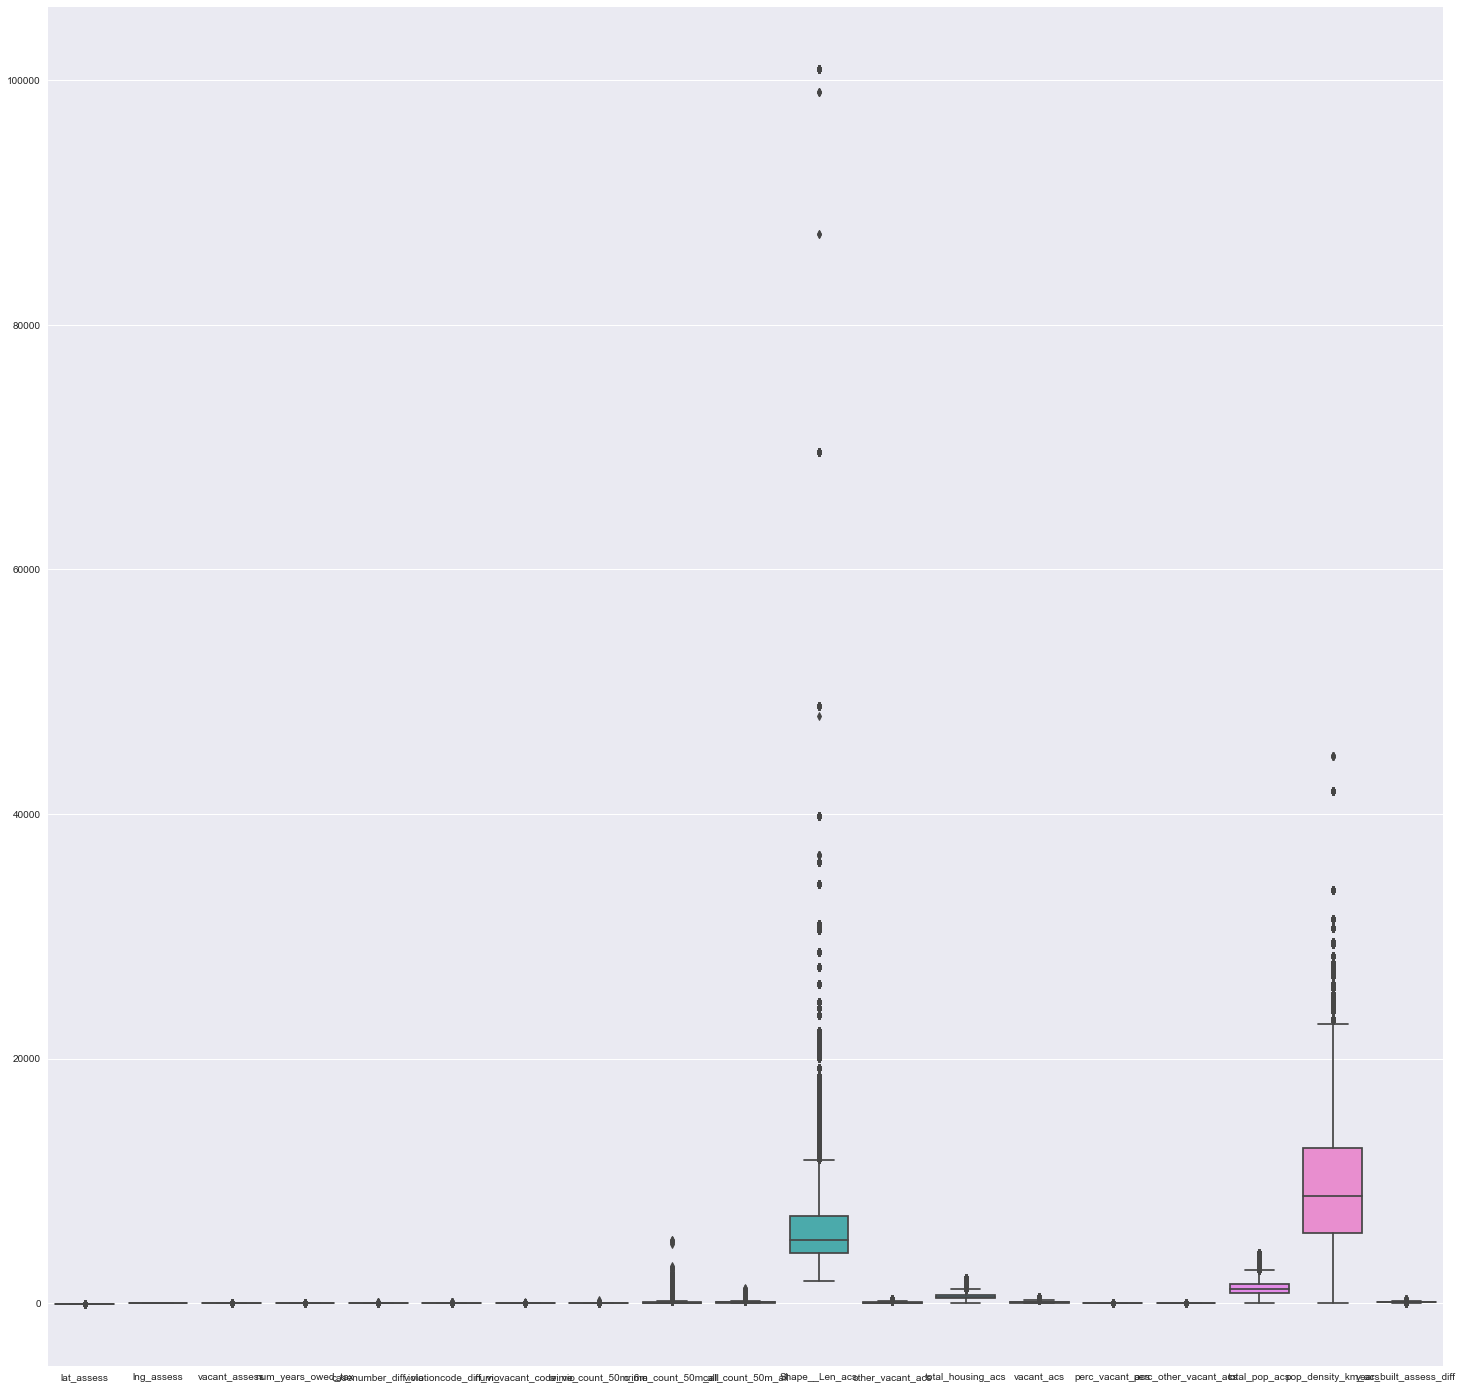

In [537]:
#box plot of some of the columns
f, ax = plt.subplots(figsize=(25, 25))
sns.boxplot(data = df.drop(['market_value_2015_assess', 'market_value_2021_assess', 'Shape__Are_acs', 'total_due_tax', 'depth_assess'], axis = 1), ax = ax)

<AxesSubplot:>

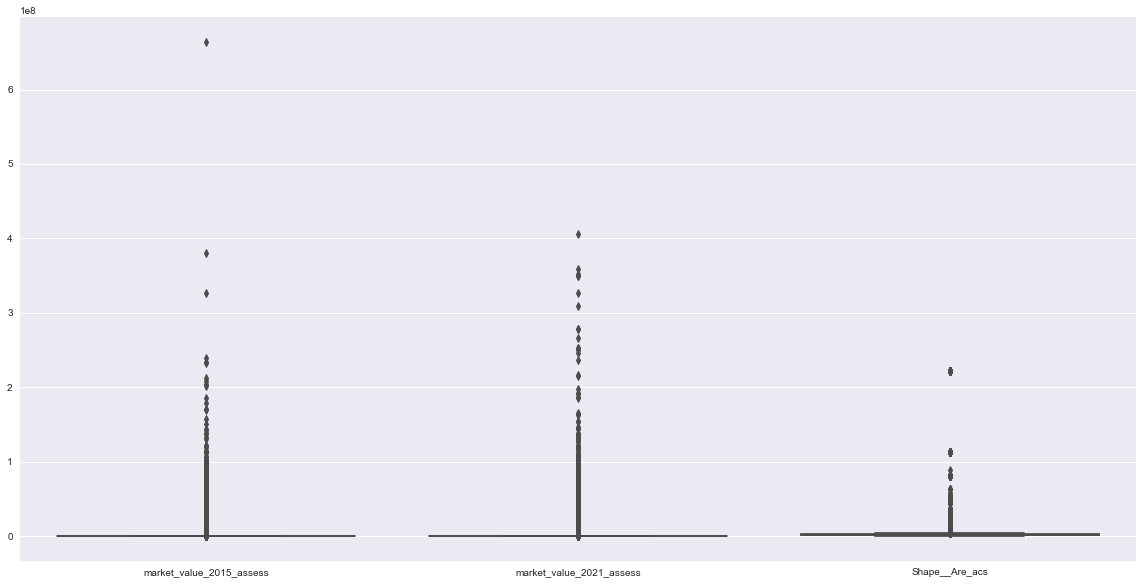

In [538]:
#box plot
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = df[['market_value_2015_assess', 'market_value_2021_assess', 'Shape__Are_acs']], ax = ax)

<AxesSubplot:>

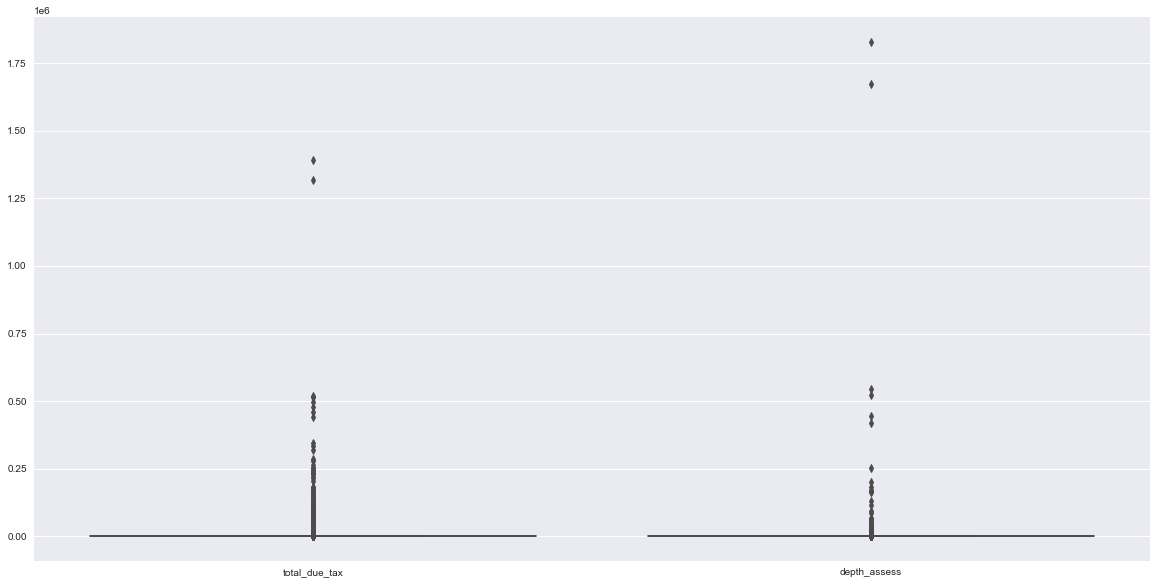

In [539]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = df[['total_due_tax', 'depth_assess']], ax = ax)

In [540]:
#converting some of the boolean value to strings
df['is_actionable_tax'] = df['is_actionable_tax'].replace({True : 'True',
                                False : 'False'})
df['sequestration_enforcement_tax'] = df['sequestration_enforcement_tax'].replace({True : 'True',
                                False : 'False'})
df['payment_agreement_tax'] = df['payment_agreement_tax'].replace({True : 'True',
                                False : 'False'})

In [541]:
df.shape

(460901, 34)

In [542]:
df.isna().sum() 

parcel_number_assess                0
depth_assess                      507
zip_code_assess                     0
lat_assess                          0
lng_assess                          0
vacant_assess                       0
market_value_2015_assess         2956
market_value_2021_assess          321
num_years_owed_tax                  0
building_category_tax               0
is_actionable_tax                   0
sheriff_sale_tax                    0
sequestration_enforcement_tax       0
payment_agreement_tax               0
total_due_tax                       0
casenumber_diff_vio                 0
violationcode_diff_vio              0
num_vacant_code_vio                 0
crime_count_50m_6m                  0
crime_count_50m_all                 0
call_count_50m_all                  0
TRACTCE10_acs                       0
BLKGRPCE10_acs                      0
GEOID10_acs                         0
Shape__Are_acs                      0
Shape__Len_acs                      0
other_vacant

In [543]:
df.shape

(460901, 34)

In [544]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax            category
is_actionable_tax                category
sheriff_sale_tax                 category
sequestration_enforcement_tax    category
payment_agreement_tax            category
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                  int64
TRACTCE10_acs                    category
BLKGRPCE10_acs                   category
GEOID10_acs                      c

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3230475155.py:7: UserWarning: To output multiple subplots, the figure containing the passed axe

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

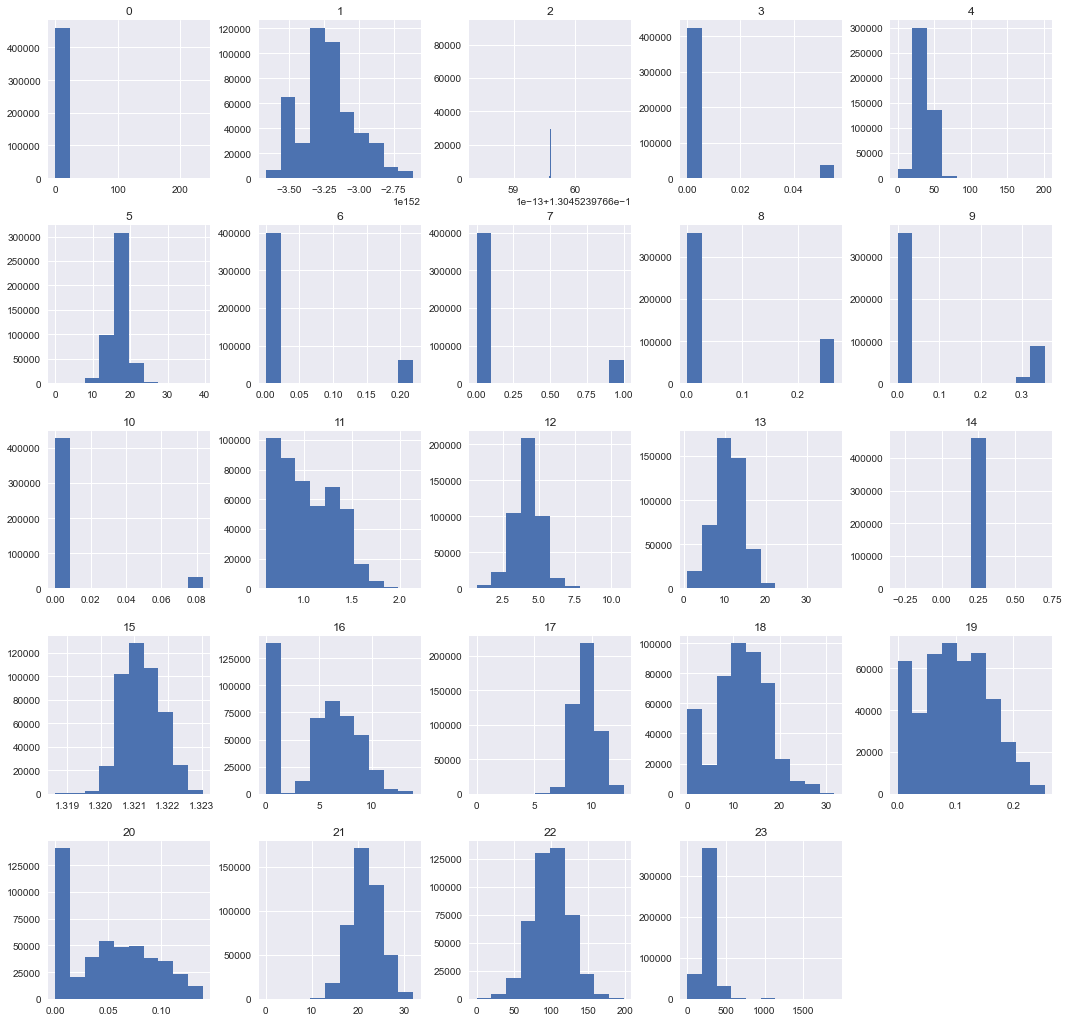

In [545]:
# most of the numerical values are skewed, this transformation is not that bad on the distribution
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
test = pt.fit_transform(df.select_dtypes(exclude = 'category'))
from pandas import DataFrame
fig,ax = plt.subplots(figsize = (18,18))
DataFrame(test).hist(ax = ax)

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3967266628.py:7: UserWarning: To output multiple subplots, the figure containing the passed axe

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

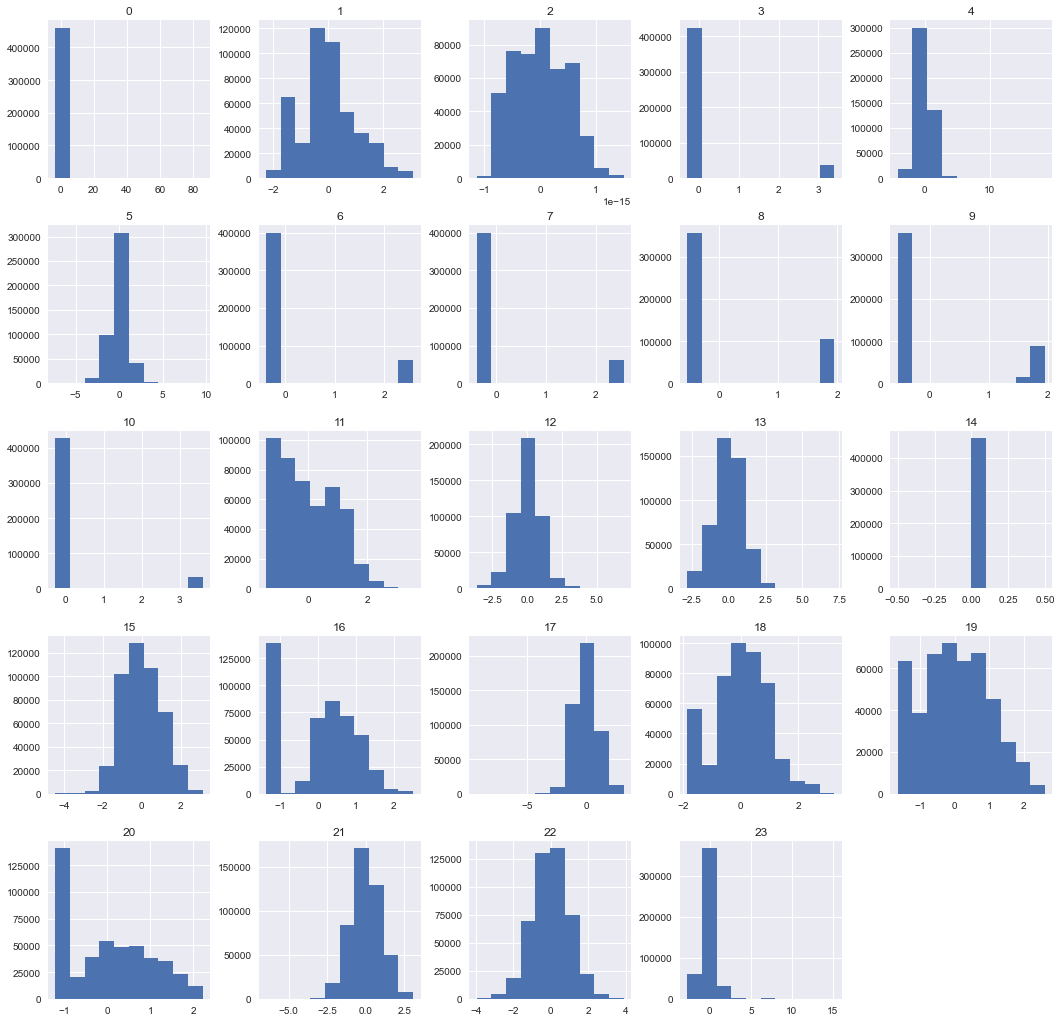

In [674]:
# most of the numerical values are skewed, this transformation is not that bad on the distribution
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
test = pt.fit_transform(df.select_dtypes(exclude = 'category'))
from pandas import DataFrame
fig,ax = plt.subplots(figsize = (18,18))
DataFrame(test).hist(ax = ax)

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3210513466.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  DataFrame(X_trans).hist(ax = ax)


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

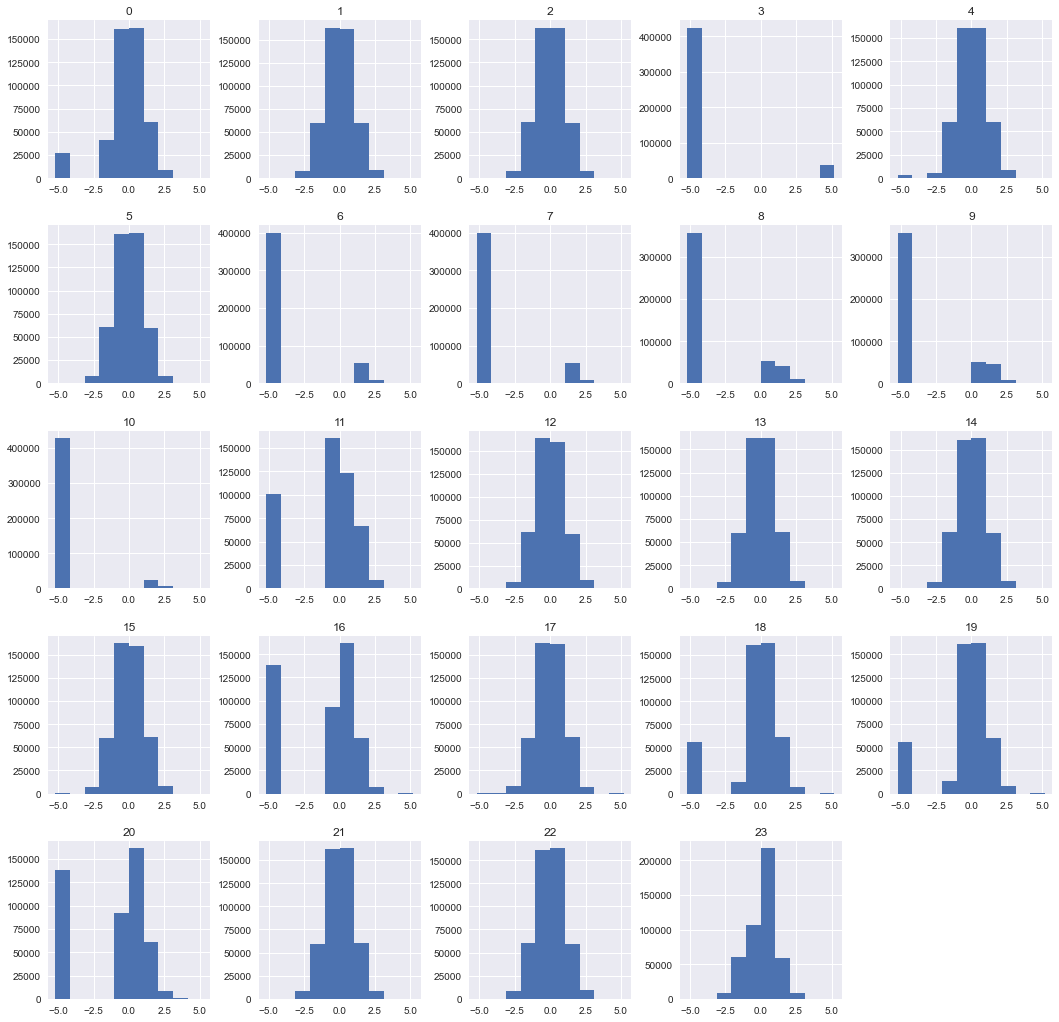

In [546]:
# most of the numerical values are skewed, QuantileTransformer  can turn into normala distribution
from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(df.select_dtypes(exclude = 'category'))
from pandas import DataFrame
fig,ax = plt.subplots(figsize = (18,18))
DataFrame(X_trans).hist(ax = ax)

<AxesSubplot:>

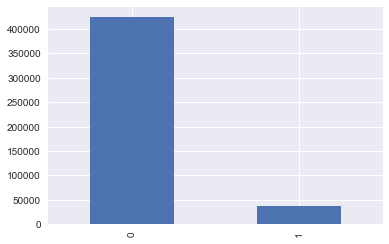

In [547]:
df.vacant_assess.value_counts().plot.bar()

In [548]:
df['zip_code_assess'].nunique()#51 unique zip codes

51

In [549]:
df = df.reset_index(drop=True)

In [550]:
df.tail()

,parcel_number_assess,depth_assess,zip_code_assess,lat_assess,lng_assess,vacant_assess,market_value_2015_assess,market_value_2021_assess,num_years_owed_tax,building_category_tax,...,Shape__Are_acs,Shape__Len_acs,other_vacant_acs,total_housing_acs,vacant_acs,perc_vacant_acs,perc_other_vacant_acs,total_pop_acs,pop_density_km_acs,year_built_assess_diff
460896,662369900,95.0,19154.0,-74.988450,40.083494,0,186000.0,208200.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,48.0
460897,662371300,95.0,19154.0,-74.987455,40.083163,0,186000.0,208200.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,48.0
460898,662371100,95.0,19154.0,-74.987589,40.083197,0,186000.0,208200.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,48.0
460899,662420600,90.0,19154.0,-74.985190,40.083194,0,181000.0,237900.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,55.0
460900,662404400,92.0,19154.0,-74.989668,40.084106,0,192500.0,210300.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,47.0


In [551]:
#df.to_csv("model_data.csv", index = False)

In [552]:
df.columns

Index(['parcel_number_assess', 'depth_assess', 'zip_code_assess', 'lat_assess',
       'lng_assess', 'vacant_assess', 'market_value_2015_assess',
       'market_value_2021_assess', 'num_years_owed_tax',
       'building_category_tax', 'is_actionable_tax', 'sheriff_sale_tax',
       'sequestration_enforcement_tax', 'payment_agreement_tax',
       'total_due_tax', 'casenumber_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio', 'crime_count_50m_6m', 'crime_count_50m_all',
       'call_count_50m_all', 'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs',
       'Shape__Are_acs', 'Shape__Len_acs', 'other_vacant_acs',
       'total_housing_acs', 'vacant_acs', 'perc_vacant_acs',
       'perc_other_vacant_acs', 'total_pop_acs', 'pop_density_km_acs',
       'year_built_assess_diff'],
      dtype='object')

In [553]:
#top 5 zip code that does not have vacant lots
df.loc[df['vacant_assess'] ==0].groupby(['vacant_assess', 'zip_code_assess'])['parcel_number_assess'].nunique().sort_values(ascending = False).head()

vacant_assess  zip_code_assess
0              19143.0            21983
               19134.0            21314
               19140.0            18855
               19124.0            18693
               19148.0            18464
Name: parcel_number_assess, dtype: int64

In [554]:
#top 5 zip codes with vacant lots
df.loc[df['vacant_assess'] ==1].groupby(['vacant_assess', 'zip_code_assess'])['parcel_number_assess'].nunique().sort_values(ascending = False).head()

vacant_assess  zip_code_assess
1              19133.0            4587
               19121.0            4074
               19132.0            3924
               19140.0            2582
               19134.0            2439
Name: parcel_number_assess, dtype: int64

In [555]:
df.shape

(460901, 34)

In [556]:
df['vacant_assess'].value_counts()

0    424202
1     36699
Name: vacant_assess, dtype: int64

In [557]:
df['parcel_number_assess'].nunique()#each row is a unique parcel number

460901

In [558]:
df_m = df.copy()#copying the datafram as we will be creating models on this

# Models

In [642]:
df = pd.read_csv('acs_city_final.csv', index_col = 0).reset_index(drop = True)

df = df.drop(['bankruptcy_tax','total_assessment_tax'], axis = 1) #remoing these as all values on bankrupcy is the same and total assessemnt is based off other value in the dataset
df = df.drop(['principal_due_tax', 'casecreateddate_year_diff_vio', 'crime_count_50m_3y6m',
        'call_count_50m_3y6m', 'occupied_acs', 'market_value_2016_assess', 'market_value_2017_assess', 
        'market_value_2018_assess', 'market_value_2019_assess', 'market_value_2020_assess'], axis = 1)#from correlation matrix
df = df.drop(['geometry_assess', 'geometry', 'buffer_50m','area_m_acs'], axis = 1) #not relevant

#manipulating yearbuilt
df['year_built_assess'] = df['year_built_assess'].replace(['196Y'], '1960')
df['year_built_assess'] = df['year_built_assess'].astype('float')
df['year_built_assess_diff'] = 2021 - df['year_built_assess']

#96 is the median, so replacing all irregular values with 96
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(2021, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(-7129.0, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace([-1, -2], 0) # replacing with 0 as the year is more than 2021 here

df['year_built_assess_diff'] = df['year_built_assess_diff'].fillna(96)#replacing all null values with 96

df = df.drop(['year_built_assess'], axis = 1)

#converting values to  objects
df['parcel_number_assess'] = df['parcel_number_assess'].astype('category')
df['zip_code_assess'] = df['zip_code_assess'].astype('category')
df['TRACTCE10_acs'] = df['TRACTCE10_acs'].astype('category')
df['BLKGRPCE10_acs'] = df['BLKGRPCE10_acs'].astype('category')
df['GEOID10_acs'] = df['GEOID10_acs'].astype('category')

#converting some of the boolean value to strings
df['is_actionable_tax'] = df['is_actionable_tax'].replace({True : 'True',
                                False : 'False'})
df['sequestration_enforcement_tax'] = df['sequestration_enforcement_tax'].replace({True : 'True',
                                False : 'False'})
df['payment_agreement_tax'] = df['payment_agreement_tax'].replace({True : 'True',
                                False : 'False'})


#replacing no-numerimal null columns-- Step is being done in pipeline so commented here
#df['building_category_tax'].fillna("no-tax", inplace = True) #residential or commercial
#df['is_actionable_tax'].fillna("no-tax", inplace = True)
#df['sheriff_sale_tax'].fillna("N", inplace = True) #N means not in shriff sale process
#df['sequestration_enforcement_tax'].fillna("False", inplace = True) #False means not in sequestration_enforcement
#df['payment_agreement_tax'].fillna("False", inplace = True)#False means not in payment agreement



#convery to category
df['is_actionable_tax'] = df['is_actionable_tax'].astype('category')
df['sequestration_enforcement_tax'] = df['sequestration_enforcement_tax'].astype('category')
df['payment_agreement_tax'] = df['payment_agreement_tax'].astype('category')
df['building_category_tax'] = df['building_category_tax'].astype('category')
df['sheriff_sale_tax'] = df['sheriff_sale_tax'].astype('category')


#replacing null values with 0 for all integer columns
df['num_years_owed_tax'] = df['num_years_owed_tax'].fillna(0)
df['total_due_tax'] = df['total_due_tax'].fillna(0)
df['casenumber_diff_vio'] = df['casenumber_diff_vio'].fillna(0)
df['violationcode_diff_vio'] = df['violationcode_diff_vio'].fillna(0)
df['num_vacant_code_vio'] = df['num_vacant_code_vio'].fillna(0)


#replace numerical null values with median-- Step is being done in pipeline so commented here
#df['depth_assess'].fillna((df['depth_assess'].median()), inplace=True)
#df['market_value_2015_assess'].fillna((df['market_value_2015_assess'].median()), inplace=True)
#df['market_value_2021_assess'].fillna((df['market_value_2021_assess'].median()), inplace=True)

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [643]:
df.select_dtypes(include = "category").columns

Index(['parcel_number_assess', 'zip_code_assess', 'building_category_tax',
       'is_actionable_tax', 'sheriff_sale_tax',
       'sequestration_enforcement_tax', 'payment_agreement_tax',
       'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs'],
      dtype='object')

In [644]:
df.select_dtypes(exclude = "category").columns

Index(['depth_assess', 'lat_assess', 'lng_assess', 'vacant_assess',
       'market_value_2015_assess', 'market_value_2021_assess',
       'num_years_owed_tax', 'total_due_tax', 'casenumber_diff_vio',
       'violationcode_diff_vio', 'num_vacant_code_vio', 'crime_count_50m_6m',
       'crime_count_50m_all', 'call_count_50m_all', 'Shape__Are_acs',
       'Shape__Len_acs', 'other_vacant_acs', 'total_housing_acs', 'vacant_acs',
       'perc_vacant_acs', 'perc_other_vacant_acs', 'total_pop_acs',
       'pop_density_km_acs', 'year_built_assess_diff'],
      dtype='object')

In [645]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax            category
is_actionable_tax                category
sheriff_sale_tax                 category
sequestration_enforcement_tax    category
payment_agreement_tax            category
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                  int64
TRACTCE10_acs                    category
BLKGRPCE10_acs                   category
GEOID10_acs                      c

In [646]:
df.isna().sum()

parcel_number_assess                  0
depth_assess                        507
zip_code_assess                       0
lat_assess                            0
lng_assess                            0
vacant_assess                         0
market_value_2015_assess           2956
market_value_2021_assess            321
num_years_owed_tax                    0
building_category_tax            399261
is_actionable_tax                399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
total_due_tax                         0
casenumber_diff_vio                   0
violationcode_diff_vio                0
num_vacant_code_vio                   0
crime_count_50m_6m                    0
crime_count_50m_all                   0
call_count_50m_all                    0
TRACTCE10_acs                         0
BLKGRPCE10_acs                        0
GEOID10_acs                           0
Shape__Are_acs                        0


/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3982607327.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'depth_assess'}>,
        <AxesSubplot:title={'center':'lat_assess'}>,
        <AxesSubplot:title={'center':'lng_assess'}>,
        <AxesSubplot:title={'center':'vacant_assess'}>,
        <AxesSubplot:title={'center':'market_value_2015_assess'}>],
       [<AxesSubplot:title={'center':'market_value_2021_assess'}>,
        <AxesSubplot:title={'center':'num_years_owed_tax'}>,
        <AxesSubplot:title={'center':'total_due_tax'}>,
        <AxesSubplot:title={'center':'casenumber_diff_vio'}>,
        <AxesSubplot:title={'center':'violationcode_diff_vio'}>],
       [<AxesSubplot:title={'center':'num_vacant_code_vio'}>,
        <AxesSubplot:title={'center':'crime_count_50m_6m'}>,
        <AxesSubplot:title={'center':'crime_count_50m_all'}>,
        <AxesSubplot:title={'center':'call_count_50m_all'}>,
        <AxesSubplot:title={'center':'Shape__Are_acs'}>],
       [<AxesSubplot:title={'center':'Shape__Len_acs'}>,
        <AxesSubplot:title={'center':'othe

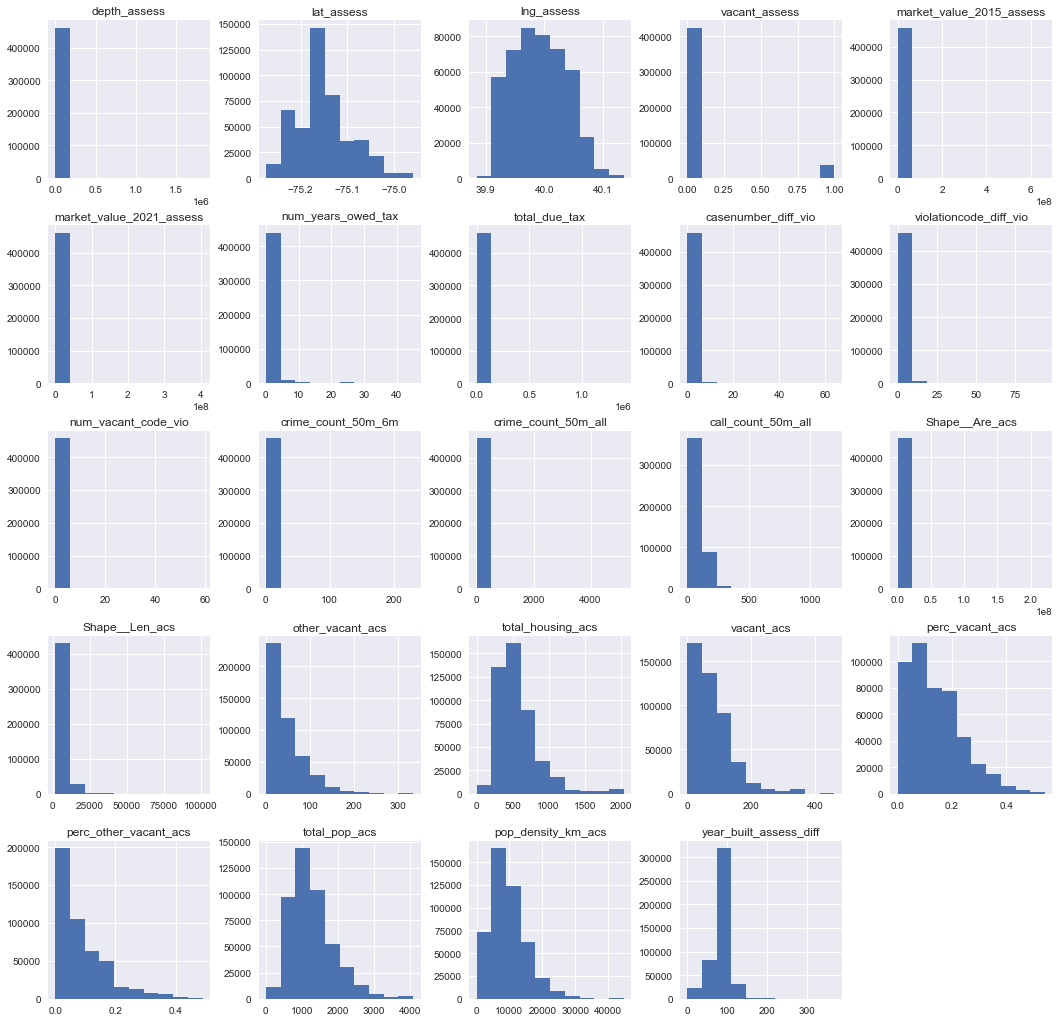

In [647]:
fig,ax = plt.subplots(figsize = (18,18))
df.hist(ax = ax)

In [648]:
df.describe()

,depth_assess,lat_assess,lng_assess,vacant_assess,market_value_2015_assess,market_value_2021_assess,num_years_owed_tax,total_due_tax,casenumber_diff_vio,violationcode_diff_vio,...,Shape__Are_acs,Shape__Len_acs,other_vacant_acs,total_housing_acs,vacant_acs,perc_vacant_acs,perc_other_vacant_acs,total_pop_acs,pop_density_km_acs,year_built_assess_diff
count,4.603940e+05,460901.000000,460901.000000,460901.000000,4.579450e+05,4.605800e+05,460901.000000,4.609010e+05,460901.000000,460901.000000,...,4.609010e+05,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000
mean,9.286732e+01,-75.151838,39.991048,0.079624,1.890623e+05,2.536247e+05,0.859870,7.626564e+02,0.483466,0.853522,...,2.197351e+06,6263.217792,42.189941,574.083907,76.594466,0.136794,0.082230,1283.391531,9687.637698,88.296265
std,4.012603e+03,0.057878,0.045676,0.270711,2.139592e+06,2.673490e+06,3.760617,5.528522e+03,1.234430,2.277929,...,4.212765e+06,3743.742788,45.562291,293.483281,65.511580,0.101137,0.086913,616.445907,5538.110479,25.939718
min,0.000000e+00,-75.274212,39.884087,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,1.803535e+05,1794.706669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.450000e+01,-75.182973,39.952386,0.000000,5.360000e+04,6.030000e+04,0.000000,0.000000e+00,0.000000,0.000000,...,9.039015e+05,4100.023828,0.000000,379.000000,31.000000,0.064327,0.000000,845.000000,5765.967268,76.000000
50%,7.100000e+01,-75.158343,39.988445,0.000000,9.660000e+04,1.135000e+05,0.000000,0.000000e+00,0.000000,0.000000,...,1.341076e+06,5173.907627,31.000000,508.000000,63.000000,0.118727,0.063551,1171.000000,8768.058757,96.000000
75%,9.333000e+01,-75.122507,40.028371,0.000000,1.561000e+05,1.971000e+05,0.000000,0.000000e+00,0.000000,0.000000,...,2.254406e+06,7163.067872,62.000000,687.000000,109.000000,0.196721,0.123894,1585.000000,12667.791311,101.000000
max,1.829520e+06,-74.959341,40.135964,1.000000,6.639432e+08,4.056370e+08,45.000000,1.391257e+06,64.000000,94.000000,...,2.213137e+08,100965.278313,334.000000,2043.000000,460.000000,0.542645,0.489933,4099.000000,44772.034568,369.000000


In [649]:
df_m = df.copy()

### Logistic Regression

In [650]:
df_1 = df_m.drop(['parcel_number_assess'], axis=1)#removing parcel_number
#df_1_obj = df_1.select_dtypes(include = [object])# create seperate dataframe with only objects

In [651]:
X = df_1.drop(['vacant_assess'], axis = 1)
Y = df_1['vacant_assess']

In [652]:
df_1.select_dtypes(include = 'category').columns

Index(['zip_code_assess', 'building_category_tax', 'is_actionable_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'TRACTCE10_acs', 'BLKGRPCE10_acs',
       'GEOID10_acs'],
      dtype='object')

In [653]:
df_1.select_dtypes(exclude = 'category').columns

Index(['depth_assess', 'lat_assess', 'lng_assess', 'vacant_assess',
       'market_value_2015_assess', 'market_value_2021_assess',
       'num_years_owed_tax', 'total_due_tax', 'casenumber_diff_vio',
       'violationcode_diff_vio', 'num_vacant_code_vio', 'crime_count_50m_6m',
       'crime_count_50m_all', 'call_count_50m_all', 'Shape__Are_acs',
       'Shape__Len_acs', 'other_vacant_acs', 'total_housing_acs', 'vacant_acs',
       'perc_vacant_acs', 'perc_other_vacant_acs', 'total_pop_acs',
       'pop_density_km_acs', 'year_built_assess_diff'],
      dtype='object')

In [654]:
X.isna().sum()

depth_assess                        507
zip_code_assess                       0
lat_assess                            0
lng_assess                            0
market_value_2015_assess           2956
market_value_2021_assess            321
num_years_owed_tax                    0
building_category_tax            399261
is_actionable_tax                399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
total_due_tax                         0
casenumber_diff_vio                   0
violationcode_diff_vio                0
num_vacant_code_vio                   0
crime_count_50m_6m                    0
crime_count_50m_all                   0
call_count_50m_all                    0
TRACTCE10_acs                         0
BLKGRPCE10_acs                        0
GEOID10_acs                           0
Shape__Are_acs                        0
Shape__Len_acs                        0
other_vacant_acs                      0


In [667]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector as selector

In [656]:
#selector(dtype_include= 'category')(df)
#selector(dtype_exclude= 'category')(df)

In [670]:
#with most replacement and null value happening in a pipeline
#no parcelid were removed here

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), #replacing the numerical null values with median
            #("scaler", StandardScaler()),
            #("transform", PowerTransformer(method='yeo-johnson', standardize=True))
            ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore") 
# there are null values, Drop of column if there is just 2 categories
#missing value is considered a seperate category

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude= 'category')),
        ("cat", categorical_transformer, selector(dtype_include= 'category'))
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=500))]
)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score on train: %.3f" % clf.score(X_train, y_train))
print("model score on test: %.3f" % clf.score(X_test, y_test))

model score on train: 0.924
model score on test: 0.925


In [664]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
cm
#84800 is true positive,84800 were not vacant lots
#442 is true negative, 442 were vacant lots
#6906 is flase negative, predicted vacant lots but it was not vacant
#33 is False positive, predicted not vacant but its vacant


array([[84800,    33],
       [ 6906,   442]])

In [666]:
from sklearn.metrics import classification_report
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, y_pred, target_names=target_names))
#high accuracy rate but very low recall and f1 score for vacant lots
#low f1 score means poor precision and poor recall
#We would like to also cover recall number. A lot of the lots were predicted as vacant but it wasnt

                 precision    recall  f1-score   support

Not Vacant Lots       0.92      1.00      0.96     84833
    Vacant Lots       0.93      0.06      0.11      7348

       accuracy                           0.92     92181
      macro avg       0.93      0.53      0.54     92181
   weighted avg       0.93      0.92      0.89     92181



In [695]:
84833/(84833+7348) # baseline of precision recall curve, we need the line to be above thisvalues for 

0.9202872609322963

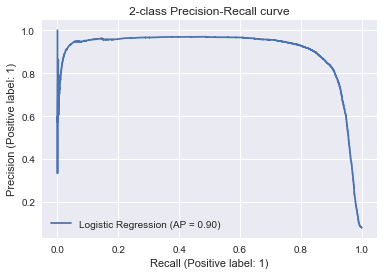

In [676]:
#precision recall curve is appropriate in this case as we are working with imbalance dataset. ROC curve is for balanced dataset
#precision recall curve is more concerend about prediction of the minority class 1
from sklearn.metrics import PrecisionRecallDisplay
#precision-recall curve without prediction

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

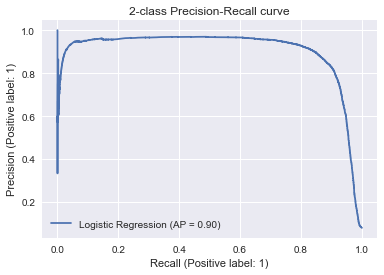

In [677]:
y_score = clf.decision_function(X_test)

#precision-recall curve with prediction
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [658]:
clf._can_transform

<bound method Pipeline._can_transform of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1ba8bca90>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1ba82bd30>)])),
                ('classifier', LogisticRegression(max_iter=500))])>

In [659]:
param_grid = {
    #"preprocessor__num__imputer__strategy": ["mean", "median"],
    "classifier__C": [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x1ba8bca90>),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x1ba82bd30>)])),
                                       ('classifier',
                                        LogisticRegres

In [660]:
#calling fit triggers the search for the best hyper parameter combination
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 10}


In [661]:
#internal cross validation scores
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.924


In [662]:
#top grid search results
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_classifier__C",
    ]
].head(5)

,mean_test_score,std_test_score,param_classifier__C
2,0.924439,0.000442,10
3,0.924433,0.000445,100
0,0.924333,0.000541,0.1
1,0.924167,0.000497,1.0


In [663]:
print(
    (
        "best logistic regression from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

best logistic regression from grid search: 0.925


In [692]:
#classification report from best value from grid search.
#the values did not change that much
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test), target_names=target_names))

                 precision    recall  f1-score   support

Not Vacant Lots       0.92      1.00      0.96     84833
    Vacant Lots       0.93      0.06      0.11      7348

       accuracy                           0.92     92181
      macro avg       0.93      0.53      0.54     92181
   weighted avg       0.93      0.92      0.89     92181

